In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = 'chipotle.tsv'

chipo = pd.read_csv(path, sep = '\t')

In [31]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [7]:
chipo.shape

(4622, 5)

In [8]:
chipo.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [9]:
chipo.index


RangeIndex(start=0, stop=4622, step=1)

In [11]:
categorical = chipo.select_dtypes(include='object').columns
numerical = chipo.select_dtypes(exclude='object').columns

print(categorical)
print(numerical)

Index(['item_name', 'choice_description', 'item_price'], dtype='object')
Index(['order_id', 'quantity'], dtype='object')


In [15]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [46]:
# chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo['item_price'].dtype

dtype('float64')

In [18]:
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [22]:
chipo[chipo.item_price > 10.00]['order_id'].count()

np.int64(1130)

In [23]:
prices = chipo[['item_name', 'item_price']]
prices

,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


In [24]:
chipo.item_name.sort_values() 

3389    6 Pack Soft Drink
341     6 Pack Soft Drink
1849    6 Pack Soft Drink
1860    6 Pack Soft Drink
2713    6 Pack Soft Drink
              ...        
2384    Veggie Soft Tacos
781     Veggie Soft Tacos
2851    Veggie Soft Tacos
1699    Veggie Soft Tacos
1395    Veggie Soft Tacos
Name: item_name, Length: 4622, dtype: object

In [25]:
chipo.sort_values(by = "item_price", ascending = False)['quantity'].head(1)

3598    15
Name: quantity, dtype: int64

In [26]:
print(chipo[chipo.item_name == "Veggie Salad Bowl"]['quantity'].sum())

18


In [30]:
condition = (chipo.item_name == "Canned Soda") & (chipo.quantity > 1)
chipo[condition]['quantity'].count()

np.int64(20)

In [32]:
unique_products = chipo['item_name'].nunique()
print(unique_products)

50


In [33]:
total_revenue = (chipo['item_price'] * chipo['quantity']).sum()
print(round(total_revenue))

39237


In [34]:
average_price = chipo['item_price'].mean()
print(round(average_price, 2))

7.46


In [35]:
total_orders = chipo['order_id'].nunique()
print(total_orders)

1834


In [36]:
total_quantity = chipo['quantity'].sum()
print(total_quantity)

4972


In [37]:
chipo[chipo['item_name'].str.contains('Chicken')]['item_name'].count()


np.int64(1560)

In [38]:
chipo.groupby('item_name')['quantity'].sum().idxmax()


'Chicken Bowl'

In [39]:
chipo.groupby('item_name').size().sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [40]:
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [41]:
avg_items_per_order = chipo.groupby('order_id')['quantity'].mean()
avg_items_per_order

order_id
1       1.0
2       2.0
3       1.0
4       1.0
5       1.0
       ... 
1830    1.0
1831    1.0
1832    1.0
1833    1.0
1834    1.0
Name: quantity, Length: 1834, dtype: float64

In [42]:
avg_items_per_order = chipo.groupby('order_id')['quantity'].mean()
avg_items_per_order

order_id
1       1.0
2       2.0
3       1.0
4       1.0
5       1.0
       ... 
1830    1.0
1831    1.0
1832    1.0
1833    1.0
1834    1.0
Name: quantity, Length: 1834, dtype: float64

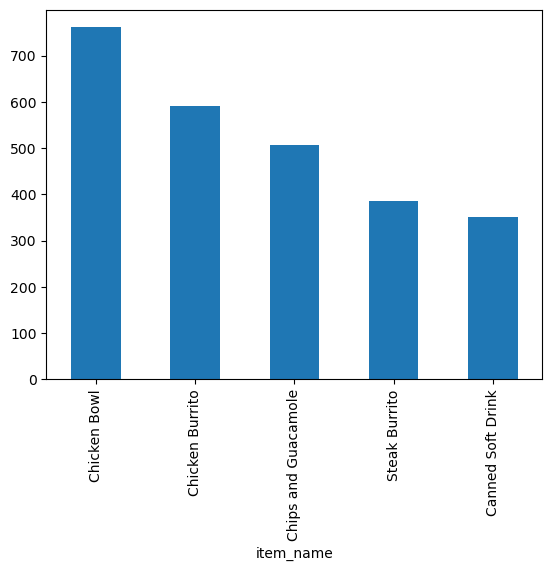

In [47]:
top5 = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(5)
top5.plot(kind='bar');


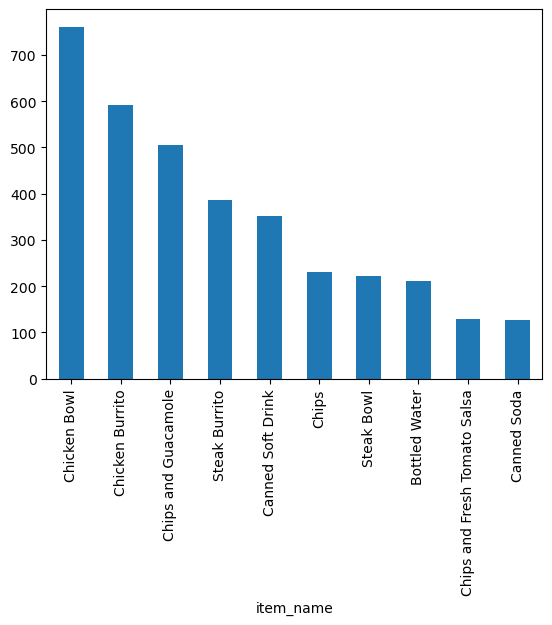

In [48]:
top10 = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
top10.plot(kind='bar'); 

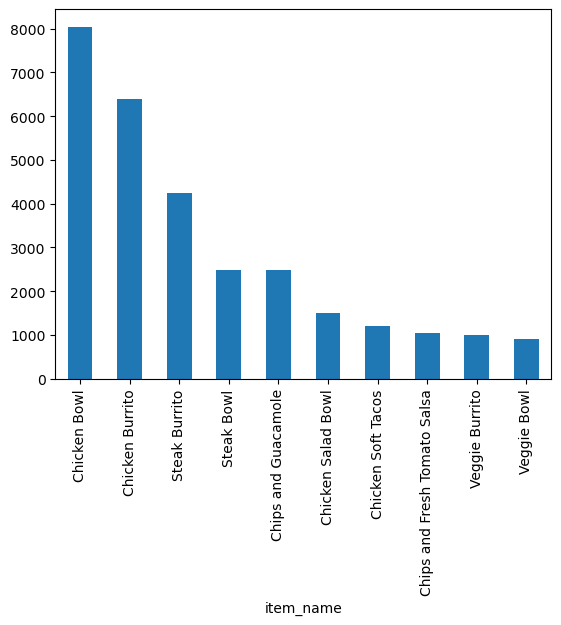

In [49]:
chipo['revenue'] = chipo['item_price']*chipo['quantity']
chipo.groupby('item_name')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar');

In [52]:
revenue = (chipo['item_price'] * chipo['quantity']).groupby(chipo['item_name']).sum() 

<Axes: xlabel='item_name'>

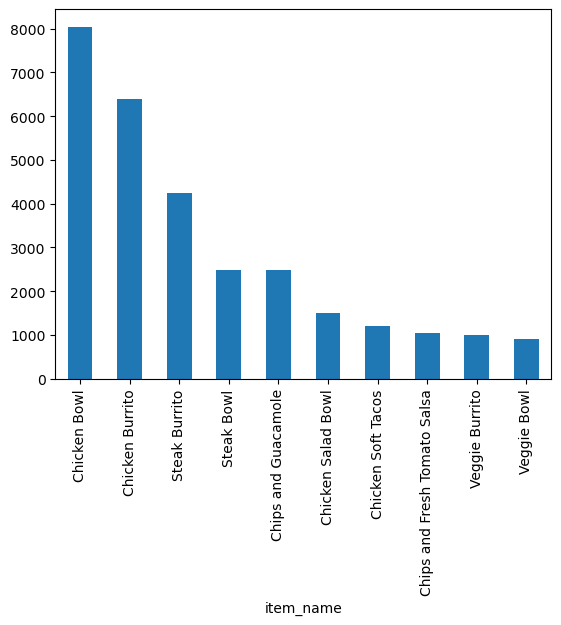

In [53]:
top10_revenue = revenue.sort_values(ascending=False).head(10)

top10_revenue.plot(kind='bar')